### **libs**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm
import torch

import sys
sys.path.append('D:\diplom_2\my_test')
import my_funcs as mf

import my_thermal_funcs as mtf

## **INFO:**

1) Зафиксировл n, 
2) train_size=0.5. 

Другие некоторые параметры перебираю

# **n=21**

(21, 242)
ModuleList(
  (0): Linear(in_features=5, out_features=24, bias=True)
  (1-2): 2 x Linear(in_features=24, out_features=24, bias=True)
  (3): Linear(in_features=24, out_features=1, bias=True)
)
full_sample (6, 25)
train (6, 17)
test (6, 8)
E1


100%|████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 3007.75it/s]


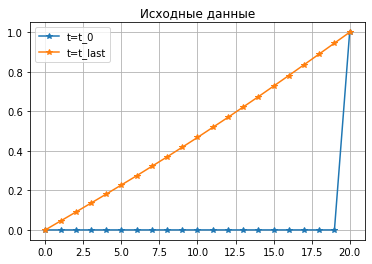

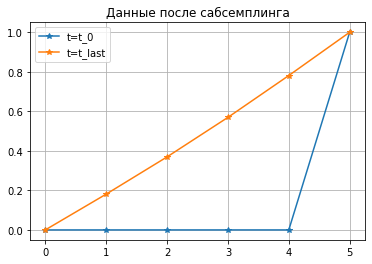

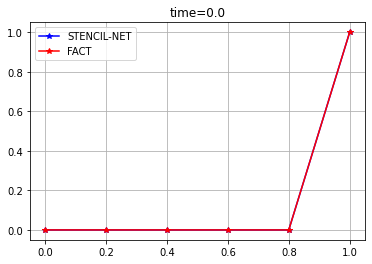

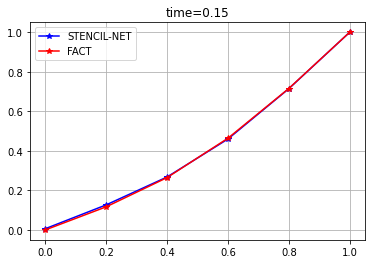

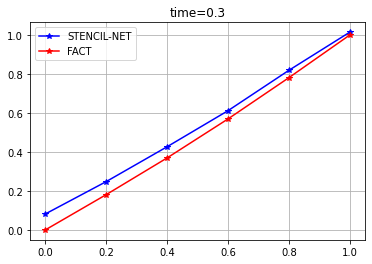

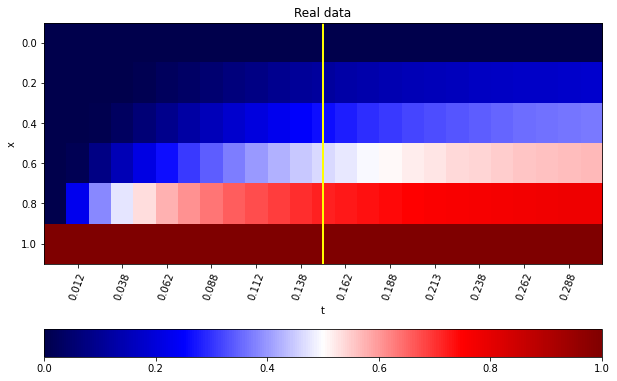

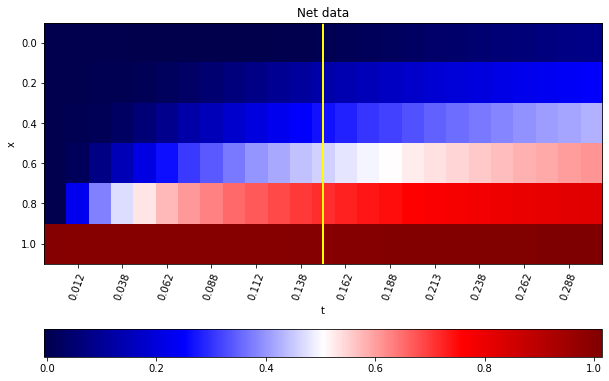

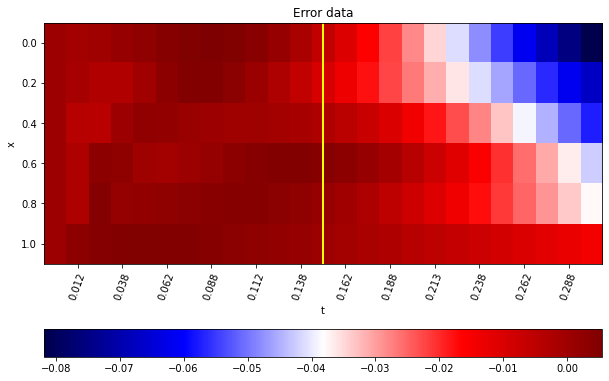

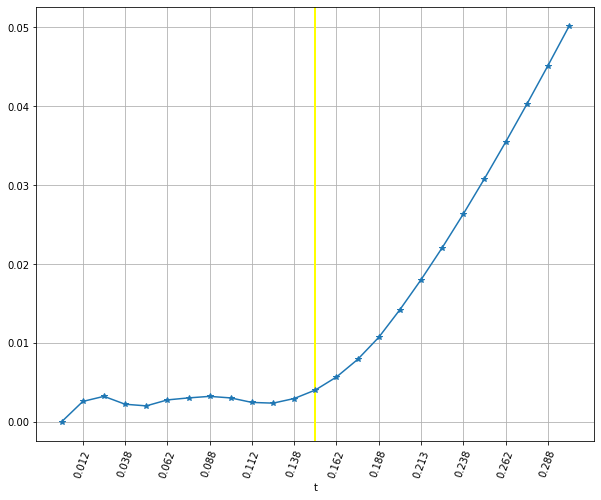

In [6]:
# -------------Начальные параметры---------
L=1
n=21
T=0.3
h=L/(n-1)
tau=0.00125
train_split=0.7

# ------------Варьируемые параметры--------
path_param="data/models/best_params_n=21_[[5], 24, 3, 0.01, 2, False, 'E1', 0.2].xlsx"
params=data=pd.read_excel(path_param).T
method=params.loc['method',0]


#--------------Чтение данных--------------

path_data=fr'data/thermal_v_fact_tau=0.0012500000000000002_n=21.csv'

data=pd.read_csv(path_data,header=None)
data=data.T
print(data.shape)

data=np.array(data)

plt.figure()
plt.title('Исходные данные')
plt.plot(data[:,0],'-*',label='t=t_0')
plt.plot(data[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()


#----------------Чтение нейронки----------------
path_model=fr"data/models/model_thermal_n=21_[5, 24, 3, 0.01, 2, False, 'E1', 0.2]_seed_1.pth"
net=torch.load(path_model)
print(net.layer)


#-----------------Сабсемплинг данных-----------
t_factor = 10  # time subsample factor 
s_factor = 4   # space subsample factor

Tsim=len(data[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=mf.subsampling(s_factor,t_factor,h,tau,Tsim,n,data,train_split=train_split)

plt.figure()
plt.title('Данные после сабсемплинга')
plt.plot(v_coarse[:,0],'-*',label='t=t_0')
plt.plot(v_coarse[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()


#--------------Визуализация решения (ошибок)--------------
#device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
v_train = torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

NN_sim,T_sim,x_sim=mf.make_simulation(net,v_coarse,L,Lxc,dtc,method=method)

mf.view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=3)

mf.view_result_imshow(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(10,8))

mf.view_result_metric(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(10,8))


# **n=41**

In [7]:
h

0.05

(41, 962)
ModuleList(
  (0): Linear(in_features=9, out_features=40, bias=True)
  (1-3): 3 x Linear(in_features=40, out_features=40, bias=True)
  (4): Linear(in_features=40, out_features=1, bias=True)
)
full_sample (11, 97)
train (11, 67)
test (11, 30)
E1


100%|████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 1525.42it/s]


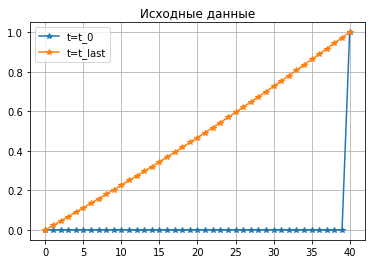

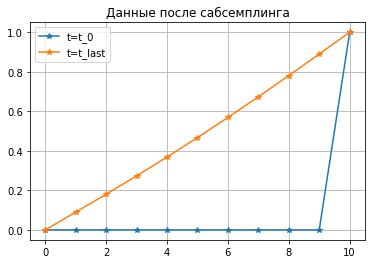

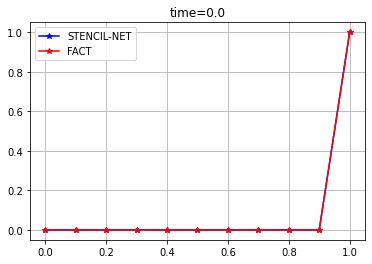

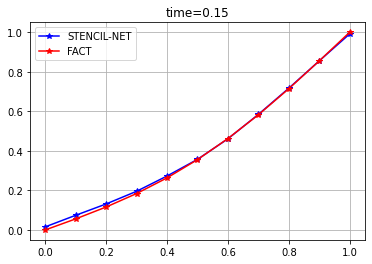

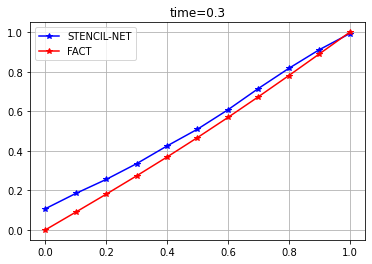

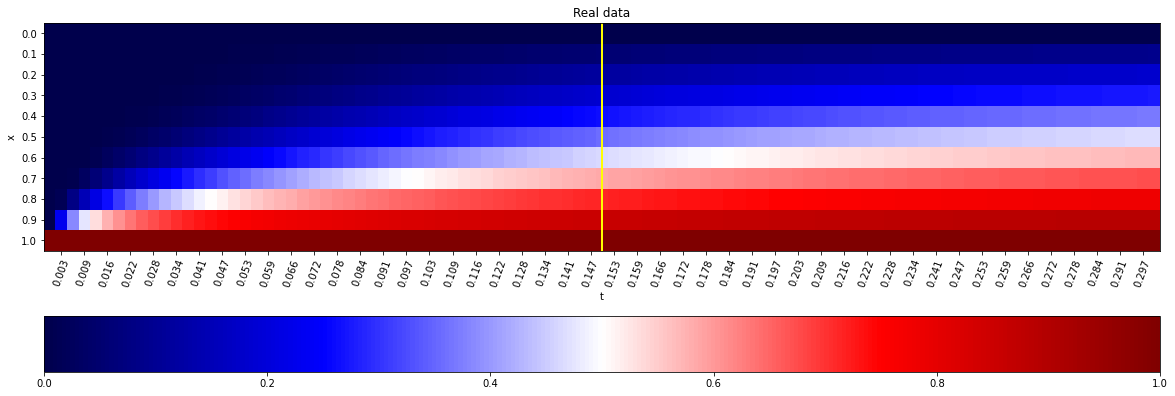

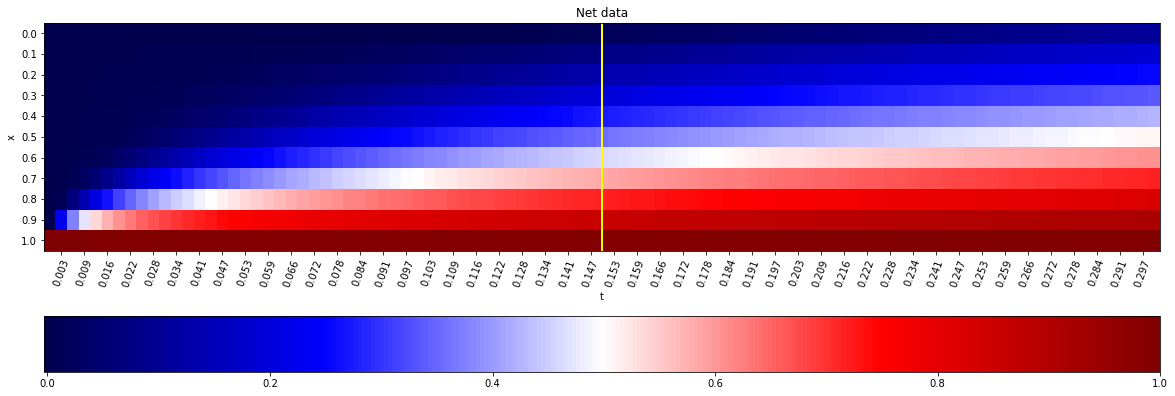

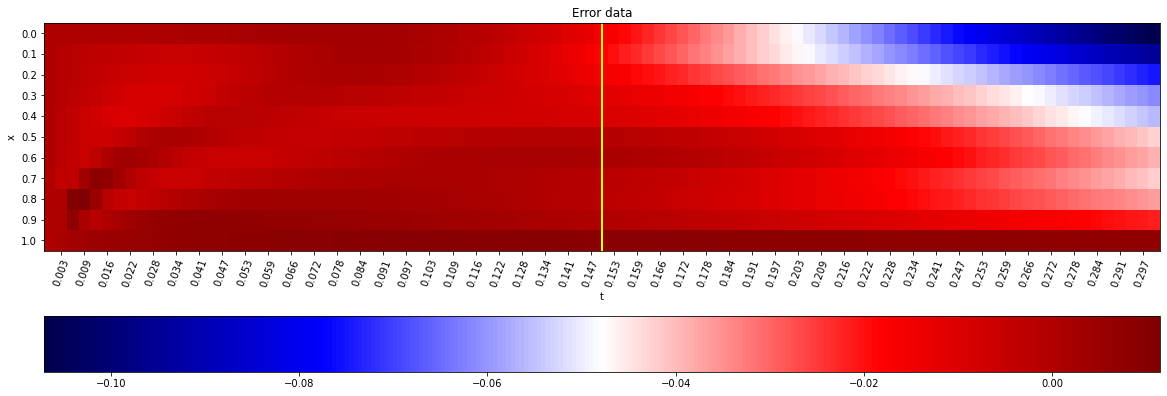

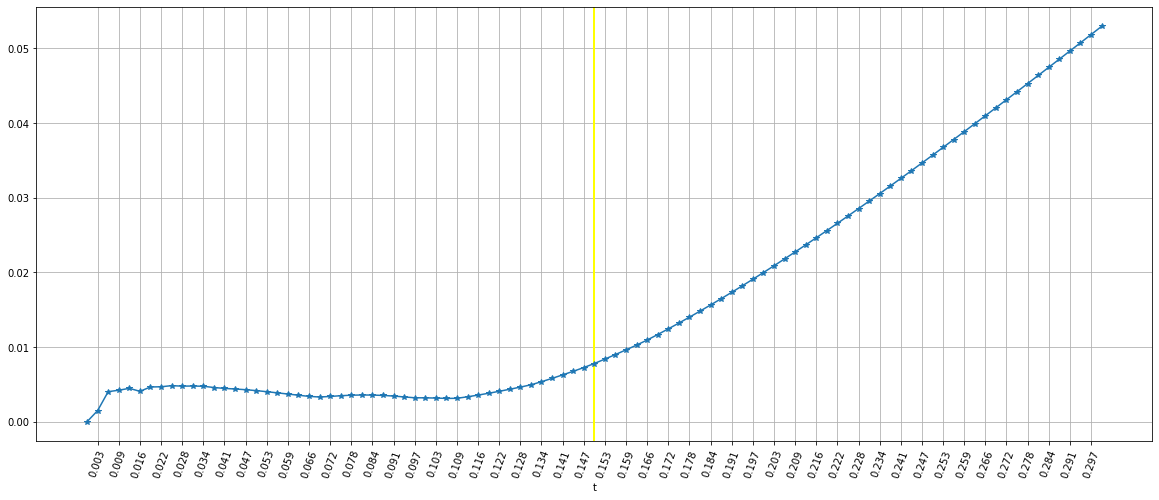

In [3]:
# -------------Начальные параметры---------
L=1
n=41
T=0.3
h=L/(n-1)
tau=0.00031250
train_split=0.7


path_param="data/models/best_params_n=41_[[9], 40, 4, 0.01, 6, False, 'E1', 0.2].xlsx"
params=data=pd.read_excel(path_param).T
method=params.loc['method',0]

#--------------Чтение данных--------------

path_data=fr'data/thermal_v_fact_tau=0.00031250000000000006_n=41.csv'

data=pd.read_csv(path_data,header=None)
data=data.T
print(data.shape)

data=np.array(data)

plt.figure()
plt.title('Исходные данные')
plt.plot(data[:,0],'-*',label='t=t_0')
plt.plot(data[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()


#----------------Чтение нейронки----------------
path_model=fr"data/models/model_thermal_n=41_[9, 40, 4, 0.01, 6, False, 'E1', 0.2]_seed_1.pth"
net=torch.load(path_model)
print(net.layer)



#-----------------Сабсемплинг данных-----------
t_factor = 10  # time subsample factor 
s_factor = 4   # space subsample factor

Tsim=len(data[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=mf.subsampling(s_factor,t_factor,h,tau,Tsim,n,data,train_split=train_split)

plt.figure()
plt.title('Данные после сабсемплинга')
plt.plot(v_coarse[:,0],'-*',label='t=t_0')
plt.plot(v_coarse[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()


#--------------Визуализация решения (ошибок)--------------
#device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
v_train = torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

NN_sim,T_sim,x_sim=mf.make_simulation(net,v_coarse,L,Lxc,dtc,method=method)

mf.view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=3)

mf.view_result_imshow(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(20,8))

mf.view_result_metric(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(20,8))


# **n=81**

(81, 3841)
ModuleList(
  (0): Linear(in_features=5, out_features=48, bias=True)
  (1-3): 3 x Linear(in_features=48, out_features=48, bias=True)
  (4): Linear(in_features=48, out_features=1, bias=True)
)
full_sample (21, 385)
train (21, 269)
test (21, 116)
E1


100%|██████████████████████████████████████████████████████████████| 384/384 [00:00<00:00, 1017.98it/s]


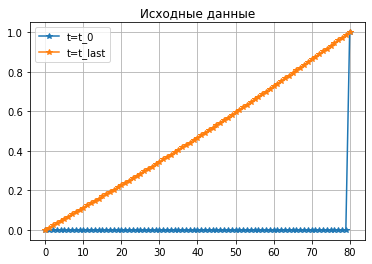

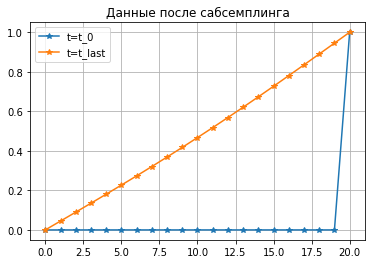

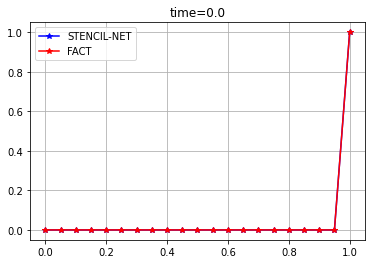

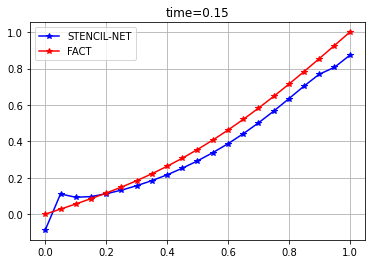

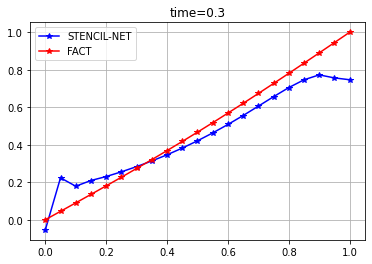

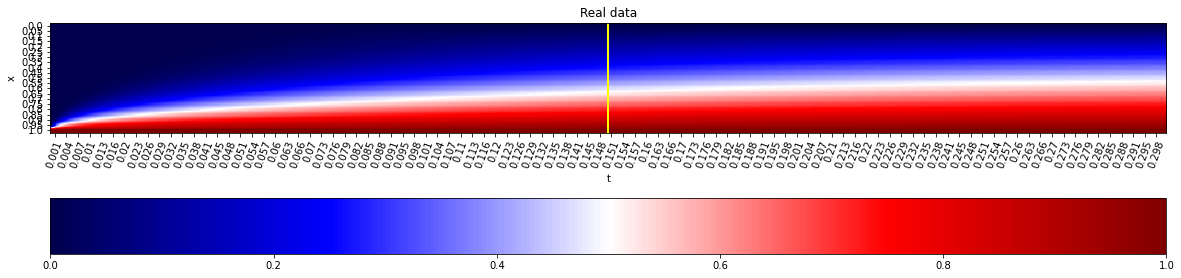

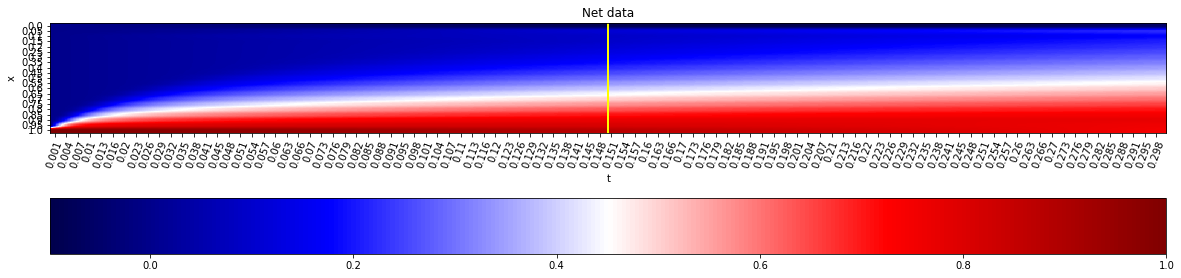

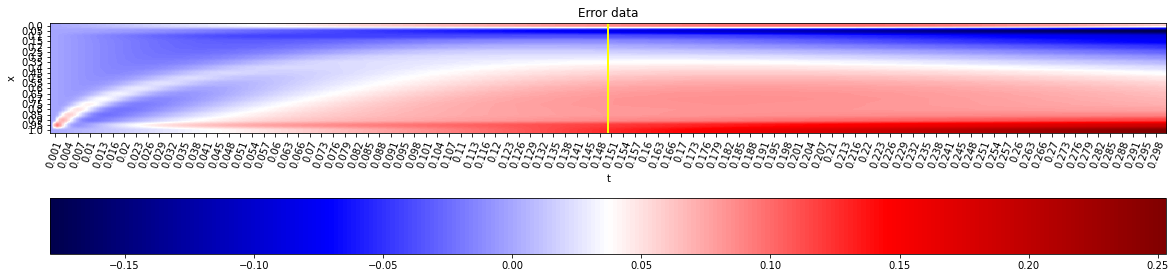

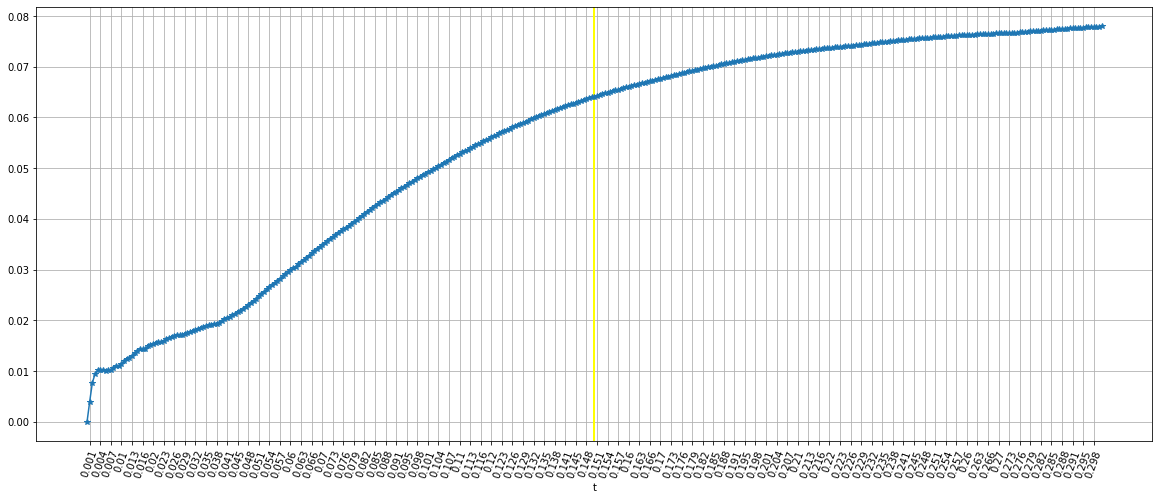

In [4]:
# -------------Начальные параметры---------
L=1
n=81
T=0.3
h=L/(n-1)
tau=7.812500000000002e-05
train_split=0.7


path_param="data/models/best_params_n=81_[[5], 48, 4, 0.01, 6, False, 'E1', 0.2].xlsx"
params=data=pd.read_excel(path_param).T
method=params.loc['method',0]


#--------------Чтение данных--------------

path_data=fr'data/thermal_v_fact_tau=7.812500000000002e-05_n=81.csv'

data=pd.read_csv(path_data,header=None)
data=data.T
print(data.shape)

data=np.array(data)

plt.figure()
plt.title('Исходные данные')
plt.plot(data[:,0],'-*',label='t=t_0')
plt.plot(data[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()


#----------------Чтение нейронки----------------
path_model=fr"data/models/model_thermal_n=81_[5, 48, 4, 0.01, 6, False, 'E1', 0.2]_seed_1.pth"
net=torch.load(path_model)
print(net.layer)



#-----------------Сабсемплинг данных-----------
t_factor = 10  # time subsample factor 
s_factor = 4   # space subsample factor

Tsim=len(data[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=mf.subsampling(s_factor,t_factor,h,tau,Tsim,n,data,train_split=train_split)

plt.figure()
plt.title('Данные после сабсемплинга')
plt.plot(v_coarse[:,0],'-*',label='t=t_0')
plt.plot(v_coarse[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()


#--------------Визуализация решения (ошибок)--------------
#device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
v_train = torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

NN_sim,T_sim,x_sim=mf.make_simulation(net,v_coarse,L,Lxc,dtc,method=method)

mf.view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=3)

mf.view_result_imshow(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(20,8),n_xticks=4)

mf.view_result_metric(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(20,8),n_xticks=4)
